In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
#Lets read crime rate for Chicago
crime_file = "crime-Chicago/CHI_CRIME_2012_2017.csv"
crime_CHI = pd.read_csv(crime_file, encoding="us-ascii")

crime_CHI_2015 = crime_CHI[crime_CHI['Date'].str.contains('2015')]
crime_CHI_2015

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,7.0,43.0,02,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,27.0,06,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,44.0,6.0,08A,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)"
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,36.0,19.0,02,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)"
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,45.0,11.0,18,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)"
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,20.0,42.0,18,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)"
746,207605,10192026,HY360910,07/29/2015 04:21:21 PM,029XX W FLOURNOY ST,2027,NARCOTICS,POSS: CRACK,APARTMENT,True,...,2.0,27.0,18,1156974.0,1896894.0,2015,05/12/2016 03:48:29 PM,41.872848,-87.699144,"(41.872848316, -87.69914356)"
747,207671,10203133,HY381916,08/14/2015 10:55:00 AM,054XX W WALTON ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,VEHICLE NON-COMMERCIAL,True,...,37.0,25.0,18,1139924.0,1905802.0,2015,05/12/2016 03:48:29 PM,41.897622,-87.761525,"(41.897621617, -87.761524853)"
748,207803,10211492,HY257237,05/12/2015 11:54:19 AM,066XX S WASHTENAW AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,15.0,66.0,18,1159517.0,1860604.0,2015,05/12/2016 03:48:29 PM,41.773212,-87.690803,"(41.773212262, -87.690803401)"
750,208172,10211589,HY340025,07/14/2015 06:00:00 AM,033XX W FILLMORE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,POLICE FACILITY/VEH PARKING LOT,True,...,24.0,29.0,18,1154228.0,1895173.0,2015,05/12/2016 03:48:29 PM,41.868181,-87.709271,"(41.868180939, -87.709271389)"


In [3]:
crime_CHI_2015[['Month','Day','Ext']] = crime_CHI_2015['Date'].str.split('/', expand=True)
crime_CHI_2015[['Year','Time']] = crime_CHI_2015['Ext'].str.split(' ', 1, expand=True)
crime_CHI_2015 = crime_CHI_2015.drop(['Ext'], axis=1)

crime_CHI_2015

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Time
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,01,01,12:00:00 AM
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,11,24,05:30:00 PM
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",05,19,01:12:00 AM
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",01,01,12:00:00 AM
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)",06,24,06:00:00 AM
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)",04,09,04:30:51 PM
746,207605,10192026,HY360910,07/29/2015 04:21:21 PM,029XX W FLOURNOY ST,2027,NARCOTICS,POSS: CRACK,APARTMENT,True,...,1156974.0,1896894.0,2015,05/12/2016 03:48:29 PM,41.872848,-87.699144,"(41.872848316, -87.69914356)",07,29,04:21:21 PM
747,207671,10203133,HY381916,08/14/2015 10:55:00 AM,054XX W WALTON ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,VEHICLE NON-COMMERCIAL,True,...,1139924.0,1905802.0,2015,05/12/2016 03:48:29 PM,41.897622,-87.761525,"(41.897621617, -87.761524853)",08,14,10:55:00 AM
748,207803,10211492,HY257237,05/12/2015 11:54:19 AM,066XX S WASHTENAW AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,1159517.0,1860604.0,2015,05/12/2016 03:48:29 PM,41.773212,-87.690803,"(41.773212262, -87.690803401)",05,12,11:54:19 AM
750,208172,10211589,HY340025,07/14/2015 06:00:00 AM,033XX W FILLMORE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,POLICE FACILITY/VEH PARKING LOT,True,...,1154228.0,1895173.0,2015,05/12/2016 03:48:29 PM,41.868181,-87.709271,"(41.868180939, -87.709271389)",07,14,06:00:00 AM


In [4]:
#Lets read temperature file to create the DF
file_temp = "weather_data/temperature.csv"
temp_df = pd.read_csv(file_temp, encoding="ISO-8859-1")
temp_df_city = temp_df[['datetime','Los Angeles','Chicago','Vancouver','Philadelphia','New York']]
temp_df_city_2015 = temp_df_city[temp_df_city['datetime'].str.contains('2015')]

#Remove the NAN. Since we have lot of data we can just drop any values
temp_df_city_2015 = temp_df_city_2015.dropna(how="any")
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York
19716,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050
19717,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050
19718,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186
19719,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186
19720,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186


In [5]:
temp_df_city_2015[['Year','Month','Ext']] = temp_df_city_2015['datetime'].str.split('-', expand=True)
temp_df_city_2015[['Day','Time']] = temp_df_city_2015['Ext'].str.split(' ', expand=True)
temp_df_city_2015 = temp_df_city_2015.drop(['Ext'], axis=1)
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Year,Month,Day,Time
19716,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050,2015,01,01,00:00:00
19717,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050,2015,01,01,01:00:00
19718,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186,2015,01,01,02:00:00
19719,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186,2015,01,01,03:00:00
19720,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186,2015,01,01,04:00:00


In [6]:
#convert Kelvin to Farenheit
# F = (K-273.15)*9/5+32
def tempconversion(kelvin):
    return round((kelvin-273.15)*9/5+32,0)
    
#temp_df_city_2015_month_avg['Los Angeles'] = temp_df_city_2015_month_avg['Los Angeles'].apply(tempconversion)
citynames = ['Los Angeles', 'Chicago', 'Vancouver', 'Philadelphia', 'New York']

for city in citynames:
    temp_df_city_2015[city] = temp_df_city_2015[city].apply(tempconversion)

temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Year,Month,Day,Time
19716,2015-01-01 00:00:00,39.0,19.0,35.0,24.0,23.0,2015,01,01,00:00:00
19717,2015-01-01 01:00:00,40.0,20.0,35.0,22.0,23.0,2015,01,01,01:00:00
19718,2015-01-01 02:00:00,38.0,21.0,35.0,21.0,21.0,2015,01,01,02:00:00
19719,2015-01-01 03:00:00,34.0,20.0,35.0,22.0,21.0,2015,01,01,03:00:00
19720,2015-01-01 04:00:00,32.0,22.0,35.0,20.0,21.0,2015,01,01,04:00:00


In [7]:
temp_df_city_2015['Date_Match'] = temp_df_city_2015['Month'].map(str) + '-' + temp_df_city_2015['Day'].map(str)
temp_df_city_2015
#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Year,Month,Day,Time,Date_Match
19716,2015-01-01 00:00:00,39.0,19.0,35.0,24.0,23.0,2015,01,01,00:00:00,01-01
19717,2015-01-01 01:00:00,40.0,20.0,35.0,22.0,23.0,2015,01,01,01:00:00,01-01
19718,2015-01-01 02:00:00,38.0,21.0,35.0,21.0,21.0,2015,01,01,02:00:00,01-01
19719,2015-01-01 03:00:00,34.0,20.0,35.0,22.0,21.0,2015,01,01,03:00:00,01-01
19720,2015-01-01 04:00:00,32.0,22.0,35.0,20.0,21.0,2015,01,01,04:00:00,01-01
19721,2015-01-01 05:00:00,29.0,21.0,35.0,20.0,20.0,2015,01,01,05:00:00,01-01
19722,2015-01-01 06:00:00,29.0,21.0,35.0,21.0,20.0,2015,01,01,06:00:00,01-01
19723,2015-01-01 07:00:00,25.0,21.0,35.0,21.0,20.0,2015,01,01,07:00:00,01-01
19724,2015-01-01 08:00:00,23.0,21.0,35.0,21.0,20.0,2015,01,01,08:00:00,01-01
19725,2015-01-01 09:00:00,24.0,20.0,35.0,20.0,20.0,2015,01,01,09:00:00,01-01


In [16]:
temp_grp = temp_df_city_2015.groupby('Date_Match')
temp_df_city_2015_grp_date = round(temp_grp.mean(),0)
temp_df_city_2015_grp_date

,Los Angeles,Chicago,Vancouver,Philadelphia,New York
Date_Match,,,,,
01-01,35.0,23.0,33.0,25.0,24.0
01-02,34.0,28.0,36.0,34.0,34.0
01-03,36.0,33.0,36.0,29.0,28.0
01-04,41.0,31.0,38.0,50.0,41.0
01-05,42.0,6.0,40.0,38.0,40.0
01-06,47.0,11.0,45.0,21.0,21.0
01-07,50.0,8.0,42.0,19.0,18.0
01-08,57.0,1.0,42.0,14.0,12.0
01-09,57.0,8.0,42.0,23.0,22.0


In [11]:
crime_CHI_2015['Date_Match'] = crime_CHI_2015['Month'].map(str) + '-' + crime_CHI_2015['Day'].map(str)
crime_CHI_2015

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Time,Date_Match
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,01,01,12:00:00 AM,01-01
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,11,24,05:30:00 PM,11-24
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",05,19,01:12:00 AM,05-19
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",01,01,12:00:00 AM,01-01
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)",06,24,06:00:00 AM,06-24
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)",04,09,04:30:51 PM,04-09
746,207605,10192026,HY360910,07/29/2015 04:21:21 PM,029XX W FLOURNOY ST,2027,NARCOTICS,POSS: CRACK,APARTMENT,True,...,1896894.0,2015,05/12/2016 03:48:29 PM,41.872848,-87.699144,"(41.872848316, -87.69914356)",07,29,04:21:21 PM,07-29
747,207671,10203133,HY381916,08/14/2015 10:55:00 AM,054XX W WALTON ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,VEHICLE NON-COMMERCIAL,True,...,1905802.0,2015,05/12/2016 03:48:29 PM,41.897622,-87.761525,"(41.897621617, -87.761524853)",08,14,10:55:00 AM,08-14
748,207803,10211492,HY257237,05/12/2015 11:54:19 AM,066XX S WASHTENAW AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,1860604.0,2015,05/12/2016 03:48:29 PM,41.773212,-87.690803,"(41.773212262, -87.690803401)",05,12,11:54:19 AM,05-12
750,208172,10211589,HY340025,07/14/2015 06:00:00 AM,033XX W FILLMORE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,POLICE FACILITY/VEH PARKING LOT,True,...,1895173.0,2015,05/12/2016 03:48:29 PM,41.868181,-87.709271,"(41.868180939, -87.709271389)",07,14,06:00:00 AM,07-14


In [15]:
crime_grp = crime_CHI_2015.groupby('Date_Match')
crime_CHI_2015_grp_crime = crime_grp.count()
crime_CHI_2015_grp_crime

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Time
Date_Match,,,,,,,,,,,,,,,,,,,,,
01-01,1030,1030,1030,1030,1030,1030,1030,1030,1028,1030,...,971,971,1030,1030,971,971,971,1030,1030,1030
01-02,670,670,670,670,670,670,670,670,670,670,...,652,652,670,670,652,652,652,670,670,670
01-03,648,648,648,648,648,648,648,648,648,648,...,636,636,648,648,636,636,636,648,648,648
01-04,513,513,513,513,513,513,513,513,513,513,...,498,498,513,513,498,498,498,513,513,513
01-05,517,517,517,517,517,517,517,517,515,517,...,510,510,517,517,510,510,510,517,517,517
01-06,501,501,501,501,501,501,501,501,500,501,...,496,496,501,501,496,496,496,501,501,501
01-07,472,472,472,472,472,472,472,472,472,472,...,467,467,472,472,467,467,467,472,472,472
01-08,444,444,444,444,444,444,444,444,443,444,...,437,437,444,444,437,437,437,444,444,444
01-09,585,585,585,585,585,585,585,585,584,585,...,580,580,585,585,580,580,580,585,585,585


In [19]:
combined_df = pd.merge(temp_df_city_2015_grp_date, crime_CHI_2015_grp_crime, on='Date_Match')
combined_df.head()

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Unnamed: 0,ID,Case Number,Date,Block,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Time
Date_Match,,,,,,,,,,,,,,,,,,,,,
01-01,35.0,23.0,33.0,25.0,24.0,1030,1030,1030,1030,1030,...,971,971,1030,1030,971,971,971,1030,1030,1030
01-02,34.0,28.0,36.0,34.0,34.0,670,670,670,670,670,...,652,652,670,670,652,652,652,670,670,670
01-03,36.0,33.0,36.0,29.0,28.0,648,648,648,648,648,...,636,636,648,648,636,636,636,648,648,648
01-04,41.0,31.0,38.0,50.0,41.0,513,513,513,513,513,...,498,498,513,513,498,498,498,513,513,513
01-05,42.0,6.0,40.0,38.0,40.0,517,517,517,517,517,...,510,510,517,517,510,510,510,517,517,517


In [21]:
combined_df.columns

Index(['Los Angeles', 'Chicago', 'Vancouver', 'Philadelphia', 'New York',
       'Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Month', 'Day', 'Time'],
      dtype='object')

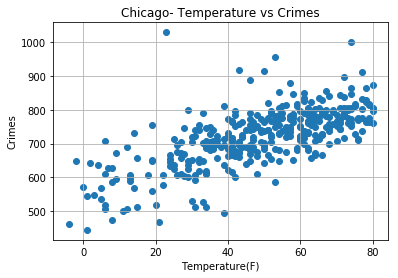

In [36]:
x = combined_df.groupby('Chicago')
plt.scatter(combined_df['Chicago'], combined_df['Arrest'])
plt.title('Chicago- Temperature vs Crimes')
plt.grid()
plt.xlabel("Temperature(F)")
plt.ylabel("Crimes")
plt.show()